In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

In [3]:
df=pd.read_csv("E:/Downloads/loan_approval_dataset.csv")
df.head(10)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved
9,10,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected


In [4]:
df.shape

(4269, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [6]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.columns = df.columns.str.strip().str.lower()
df['loan_status'] = df['loan_status'].str.strip() 

df['loan_status'] = df['loan_status'].map({'Approved': 1, 'Rejected': 0})


In [9]:
print(df['loan_status'].unique())


[1 0]


In [10]:
df['loan_status'].value_counts()

loan_status
1    2656
0    1613
Name: count, dtype: int64

In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_id,4269.0,2.135000e+03,1.232498e+03,1.0,1068.0,2135.0,3202.0,4269.0
no_of_dependents,4269.0,2.498712e+00,1.695910e+00,0.0,1.0,3.0,4.0,5.0
income_annum,4269.0,5.059124e+06,2.806840e+06,200000.0,2700000.0,5100000.0,7500000.0,9900000.0
loan_amount,4269.0,1.513345e+07,9.043363e+06,300000.0,7700000.0,14500000.0,21500000.0,39500000.0
loan_term,4269.0,1.090045e+01,5.709187e+00,2.0,6.0,10.0,16.0,20.0
cibil_score,4269.0,5.999361e+02,1.724304e+02,300.0,453.0,600.0,748.0,900.0
residential_assets_value,4269.0,7.472617e+06,6.503637e+06,-100000.0,2200000.0,5600000.0,11300000.0,29100000.0
commercial_assets_value,4269.0,4.973155e+06,4.388966e+06,0.0,1300000.0,3700000.0,7600000.0,19400000.0
luxury_assets_value,4269.0,1.512631e+07,9.103754e+06,300000.0,7500000.0,14600000.0,21700000.0,39200000.0
bank_asset_value,4269.0,4.976692e+06,3.250185e+06,0.0,2300000.0,4600000.0,7100000.0,14700000.0


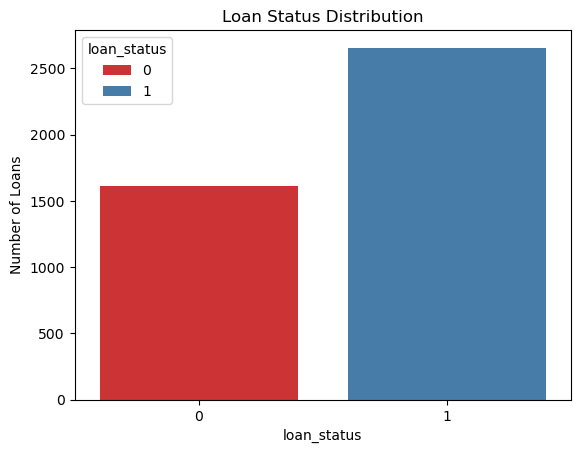

In [12]:
sns.countplot(x='loan_status', data=df,hue='loan_status', palette='Set1')
plt.title("Loan Status Distribution")
plt.ylabel("Number of Loans")
plt.show()

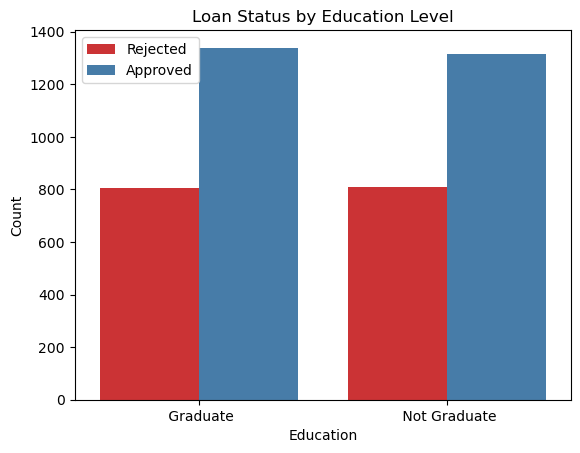

In [77]:
sns.countplot(x='education', hue='loan_status', data=df, palette='Set1')
plt.xticks(rotation=0)
plt.title("Loan Status by Education Level")
plt.xlabel("Education")
plt.ylabel("Count")
plt.legend(labels=["Rejected", "Approved"])
plt.show()

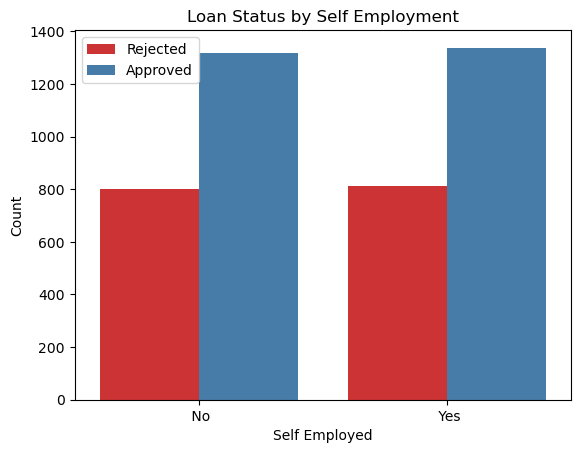

In [13]:
sns.countplot(x='self_employed', hue='loan_status', data=df, palette='Set1')
plt.title("Loan Status by Self Employment")
plt.xlabel("Self Employed")
plt.ylabel("Count")
plt.legend(labels=["Rejected", "Approved"])
plt.show()

C:\Users\mohda\AppData\Local\Temp\ipykernel_20232\2305377818.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='loan_status', y='income_annum', data=df, estimator='mean', palette='Set1')


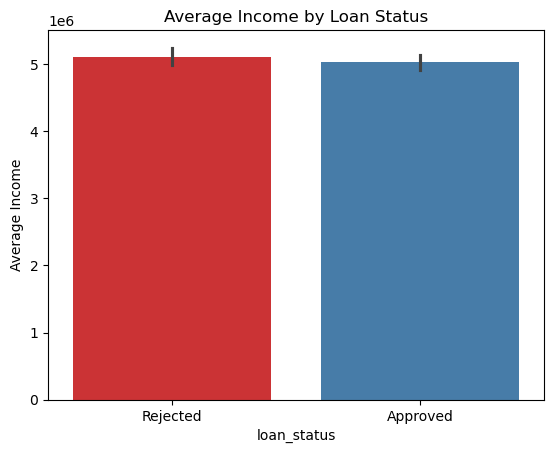

In [14]:
sns.barplot(x='loan_status', y='income_annum', data=df, estimator='mean', palette='Set1')
plt.xticks([0, 1], ['Rejected', 'Approved'])
plt.title("Average Income by Loan Status")
plt.ylabel("Average Income")
plt.show()


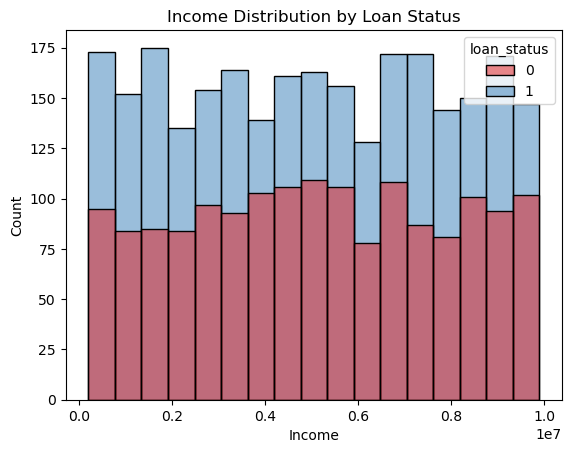

In [84]:
sns.histplot(data=df, x='income_annum', hue='loan_status',palette='Set1')
plt.title("Income Distribution by Loan Status")
plt.xlabel("Income")
plt.show()


<Axes: >

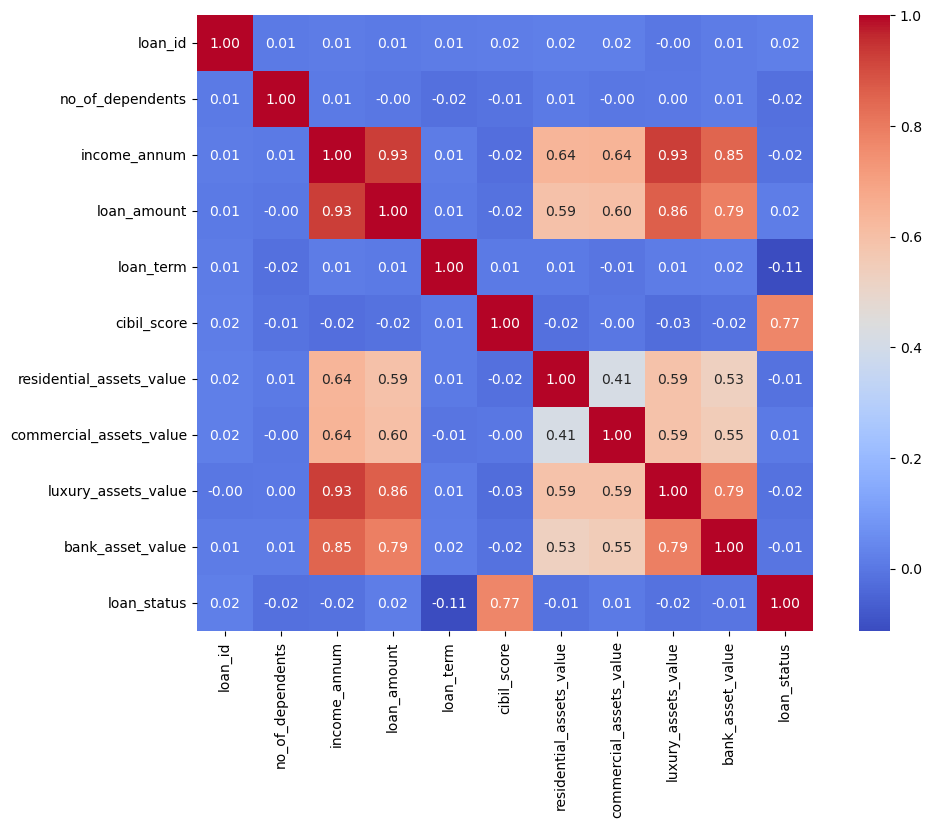

In [88]:
corr = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)

In [90]:
from sklearn.model_selection import train_test_split
X = df.drop("loan_status", axis=1)
y = df["loan_status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [91]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3415, 12), (854, 12), (3415,), (854,))

In [92]:
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

print("Numerical Columns:", num_cols)
print("Categorical Columns:", cat_cols)


Numerical Columns: ['loan_id', 'no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']
Categorical Columns: ['education', 'self_employed']


In [93]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])


In [94]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['loan_id',
                                                   'no_of_dependents',
                                                   'income_annum',
                                                   'loan_amount', 'loan_term',
                                                   'cibil_score',
                                                   'residential_assets_value',
                                                   'commercial_assets_value',
                                                   'luxury_assets_value',
                                                   'bank_asset_value']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['education',
                                                   'self_employed'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [95]:
pipeline.score(X_train, y_train)

1.0

In [96]:
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9789227166276346


In [102]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Classification Report:\n", classification_report(y_test, y_pred))

[[309   9]
 [  9 527]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       318
           1       0.98      0.98      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [120]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipeline, X, y, cv=skf, scoring='accuracy')

print("Stratified CV Mean Accuracy:", cv_scores.mean())
print("Stratified CV Accuracy per fold:", cv_scores)



Stratified CV Mean Accuracy: 0.9798567392671135
Stratified CV Accuracy per fold: [0.97775176 0.96838407 0.98126464 0.98360656 0.98827667]


In [107]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'classifier__n_estimators': randint(100, 500),
    'classifier__max_depth': [None, 5, 10, 15, 20],
    'classifier__min_samples_split': randint(2, 10)
}


In [108]:
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=5,  
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1 
)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               StandardScaler(),
                                                                               ['loan_id',
                                                                                'no_of_dependents',
                                                                                'income_annum',
                                                                                'loan_amount',
                                                                                'loan_term',
                                                                                'cibil_score',
                                                                                'residential_assets_value',
                                                                                'commercial_assets_value',
                                                                                'luxury_assets_value',
                                                                                'bank_asset_value']),
                                                                              ('cat',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               [...
                                              RandomForestClassifier(random_state=42))]),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'classifier__max_depth': [None, 5, 10,
                                                                  15, 20],
                                        'classifier__min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002060E6ACC30>,
                                        'classifier__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002060E5EA350>},
                   random_state=42, scoring='accuracy')

In [109]:
random_search.best_params_

{'classifier__max_depth': 10,
 'classifier__min_samples_split': 9,
 'classifier__n_estimators': 288}

In [110]:
random_search.best_score_

np.float64(0.9756954612005856)

In [111]:
best_model = random_search.best_estimator_

In [112]:
y_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9718969555035128


In [113]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       318
           1       0.98      0.98      0.98       536

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854

Confusion Matrix:
 [[305  13]
 [ 11 525]]


AUC Score: 0.9977764479489346


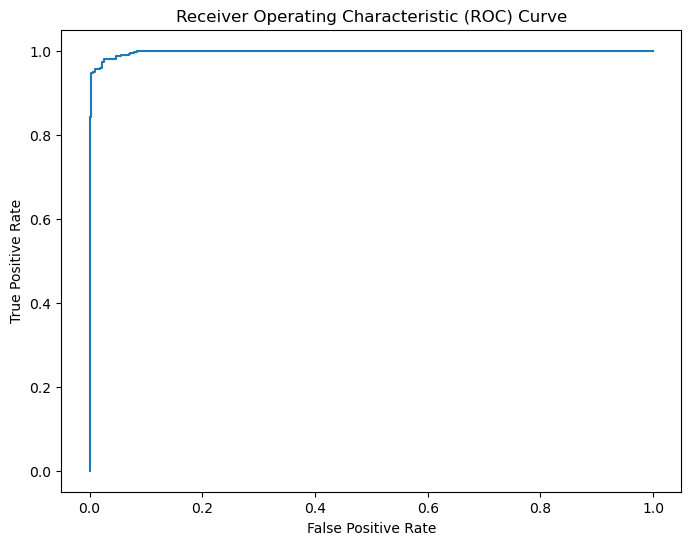

In [121]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

best_pipeline = random_search.best_estimator_

y_proba = best_pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

print("AUC Score:", roc_auc)

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.show()
